In [12]:
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [13]:
from bml_analysis_io import *
from bml_analysis_func import *
from bml_analysis_plot import *

## parse

In [14]:
prefix = 'small-molecules'
file_prefix = 'benchmark_'+prefix

In [15]:
by_model = parse(file_prefix+'.json.gz')

In [16]:
all_model_keys = list(by_model.keys())
print(all_model_keys)

['bmol_acsf_longrange_krr', 'bmol_acsf_longrange_rr', 'bmol_acsf_minimal_krr', 'bmol_acsf_minimal_rr', 'bmol_acsf_smart_krr', 'bmol_acsf_smart_rr', 'bmol_cm_eigenspectrum_krr', 'bmol_cm_eigenspectrum_rr', 'bmol_cm_sorted_l2_krr', 'bmol_cm_sorted_l2_rr', 'bmol_ecfp_krr', 'bmol_ecfp_rr', 'bmol_gylm_bayes_krr', 'bmol_gylm_grid_krr', 'bmol_mbtr_krr', 'bmol_mbtr_rr', 'bmol_physchem_basic_rf', 'bmol_physchem_basic_rr', 'bmol_physchem_core_rf', 'bmol_physchem_core_rr', 'bmol_physchem_extended_rf', 'bmol_physchem_extended_rr', 'bmol_physchem_logp_rf', 'bmol_physchem_logp_rr', 'bmol_soap_longrange_cross_krr', 'bmol_soap_longrange_cross_rr', 'bmol_soap_longrange_nocross_krr', 'bmol_soap_longrange_nocross_rr', 'bmol_soap_minimal_cross_krr', 'bmol_soap_minimal_cross_rr', 'bmol_soap_minimal_nocross_krr', 'bmol_soap_minimal_nocross_rr', 'bmol_soap_smart_cross_krr', 'bmol_soap_smart_cross_rr', 'bmol_soap_smart_nocross_krr', 'bmol_soap_smart_nocross_rr']


In [17]:
train_fraction_keys = list(by_model[all_model_keys[0]].keys())
print(train_fraction_keys)
max_train_frac = train_fraction_keys[-1]

['98:887', '197:788', '295:690', '394:591', '492:493', '591:394', '689:296', '788:197', '886:99']


## model prediction & histogram of error

__ = plot_compare_train_pred(by_model, 'bmol_soap_smart_cross_krr', True, True, 'soap_smart_cross_krr')

## analysis for individual sample

## LC

/Users/tc/Dropbox/Benchmark-ML-Carl-Felix-Bingqing/analysis-bmol/bml_analysis_plot.py:106: MatplotlibDeprecationWarning: Support for passing a (n, 1)-shaped error array to errorbar() is deprecated since Matplotlib 3.1 and will be removed in 3.3; pass a 1D array instead.
  uplims=True, lolims=True, label=label)
/Users/tc/Dropbox/Benchmark-ML-Carl-Felix-Bingqing/analysis-bmol/bml_analysis_plot.py:109: MatplotlibDeprecationWarning: Support for passing a (n, 1)-shaped error array to errorbar() is deprecated since Matplotlib 3.1 and will be removed in 3.3; pass a 1D array instead.
  uplims=True, lolims=True)


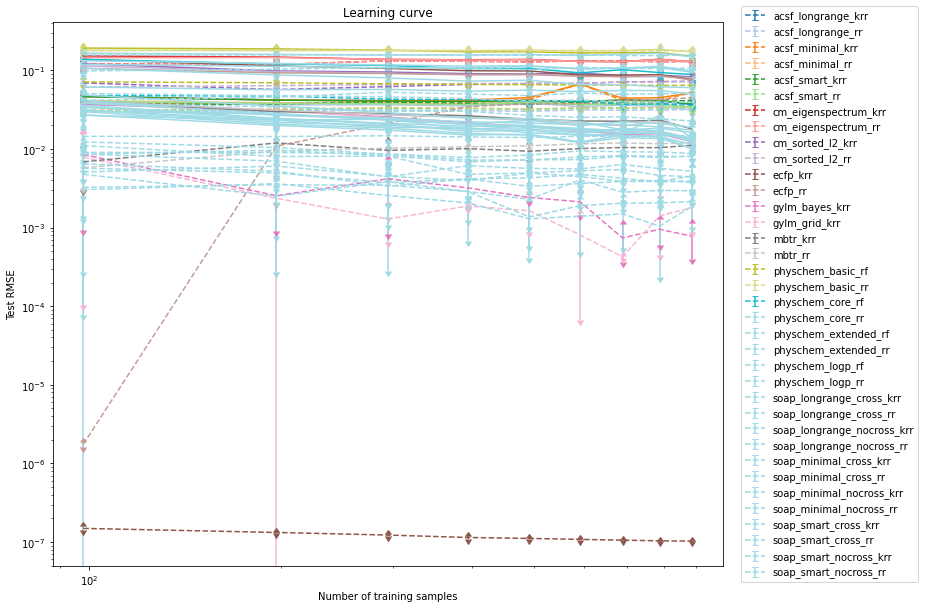

In [18]:
model_plot = all_model_keys #['bmol_soap_longrange_nocross_rr','bmol_soap_longrange_cross_rr'] 
lc_by_model = {}
sc_name='RMSE'

fig, ax = plt.subplots(figsize=(12,10))
for i, model_key in enumerate(model_plot):
    lc_by_model[model_key], _, ax = get_learning_curve(by_model, model_key_now=model_key, 
                                                       sc_name=sc_name, 
                                                       ax=ax, linecolor=cm.tab20(i), label=model_key[5:])
    
ax.set_title('Learning curve')
ax.set_xlabel('Number of training samples')
ax.set_ylabel('Test {}'.format(sc_name))

ax.set_xscale('log')
ax.set_yscale('log')

fig.savefig(file_prefix+'-'+sc_name+'-lc.pdf')

## model correlation matix

In [19]:
correlation_matrix, model_list = model_correlation_matrix(by_model, max_train_frac, 'MAE', "CORR", verbose=True)

bmol_acsf_longrange_rr bmol_acsf_longrange_krr 0.7546580817843269
bmol_acsf_minimal_krr bmol_acsf_longrange_krr 0.66001540447031
bmol_acsf_minimal_krr bmol_acsf_longrange_rr 0.5616928945311118
bmol_acsf_minimal_rr bmol_acsf_longrange_krr 0.778653030504317
bmol_acsf_minimal_rr bmol_acsf_longrange_rr 0.8888036698501066
bmol_acsf_minimal_rr bmol_acsf_minimal_krr 0.6285587930168076
bmol_acsf_smart_krr bmol_acsf_longrange_krr 0.7685061707033295
bmol_acsf_smart_krr bmol_acsf_longrange_rr 0.6996139339385796
bmol_acsf_smart_krr bmol_acsf_minimal_krr 0.6289127517823506
bmol_acsf_smart_krr bmol_acsf_minimal_rr 0.7596594366444073
bmol_acsf_smart_rr bmol_acsf_longrange_krr 0.8034534240792415
bmol_acsf_smart_rr bmol_acsf_longrange_rr 0.9252470076929434
bmol_acsf_smart_rr bmol_acsf_minimal_krr 0.6245579753292412
bmol_acsf_smart_rr bmol_acsf_minimal_rr 0.9559772433733029
bmol_acsf_smart_rr bmol_acsf_smart_krr 0.7776107174329433
bmol_cm_eigenspectrum_krr bmol_acsf_longrange_krr 0.007686225455246801
bm

bmol_physchem_basic_rr bmol_acsf_longrange_rr 0.14059403143325613
bmol_physchem_basic_rr bmol_acsf_minimal_krr 0.08034522437562801
bmol_physchem_basic_rr bmol_acsf_minimal_rr 0.1555897709696303
bmol_physchem_basic_rr bmol_acsf_smart_krr 0.11010975496746456
bmol_physchem_basic_rr bmol_acsf_smart_rr 0.15612532367845894
bmol_physchem_basic_rr bmol_cm_eigenspectrum_krr 0.4849907746459597
bmol_physchem_basic_rr bmol_cm_eigenspectrum_rr 0.48573439066831653
bmol_physchem_basic_rr bmol_cm_sorted_l2_krr 0.16604379098640093
bmol_physchem_basic_rr bmol_cm_sorted_l2_rr 0.18974714970839748
bmol_physchem_basic_rr bmol_ecfp_krr 0.1902365065855743
bmol_physchem_basic_rr bmol_ecfp_rr 0.22625181411872194
bmol_physchem_basic_rr bmol_gylm_bayes_krr -0.03373455942938668
bmol_physchem_basic_rr bmol_gylm_grid_krr -0.003375233961357231
bmol_physchem_basic_rr bmol_mbtr_krr 0.0809739723719042
bmol_physchem_basic_rr bmol_mbtr_rr 0.08751895108967668
bmol_physchem_basic_rr bmol_physchem_basic_rf 0.4830363858410467

bmol_physchem_logp_rr bmol_gylm_grid_krr -0.06519840350018496
bmol_physchem_logp_rr bmol_mbtr_krr 0.03182752166583249
bmol_physchem_logp_rr bmol_mbtr_rr 0.02122321137750973
bmol_physchem_logp_rr bmol_physchem_basic_rf 0.15666400298747277
bmol_physchem_logp_rr bmol_physchem_basic_rr 0.2398075847553505
bmol_physchem_logp_rr bmol_physchem_core_rf 0.15846988456190306
bmol_physchem_logp_rr bmol_physchem_core_rr 0.13564802618609278
bmol_physchem_logp_rr bmol_physchem_extended_rf 0.1925691386731312
bmol_physchem_logp_rr bmol_physchem_extended_rr 0.09083759233201934
bmol_physchem_logp_rr bmol_physchem_logp_rf 0.4880238859949404
bmol_soap_longrange_cross_krr bmol_acsf_longrange_krr 0.00039135240149263143
bmol_soap_longrange_cross_krr bmol_acsf_longrange_rr -0.0011298202066770619
bmol_soap_longrange_cross_krr bmol_acsf_minimal_krr 0.03934855213298172
bmol_soap_longrange_cross_krr bmol_acsf_minimal_rr 0.0022125279479131015
bmol_soap_longrange_cross_krr bmol_acsf_smart_krr 0.024044446944608448
bmo

bmol_soap_minimal_cross_krr bmol_acsf_minimal_rr 0.057965484845281016
bmol_soap_minimal_cross_krr bmol_acsf_smart_krr 0.039803842880430026
bmol_soap_minimal_cross_krr bmol_acsf_smart_rr 0.04803094505445935
bmol_soap_minimal_cross_krr bmol_cm_eigenspectrum_krr 0.015024192853722076
bmol_soap_minimal_cross_krr bmol_cm_eigenspectrum_rr 0.027005098744061033
bmol_soap_minimal_cross_krr bmol_cm_sorted_l2_krr 0.022116050358102456
bmol_soap_minimal_cross_krr bmol_cm_sorted_l2_rr 0.027893379668962104
bmol_soap_minimal_cross_krr bmol_ecfp_krr 0.21232976666521852
bmol_soap_minimal_cross_krr bmol_ecfp_rr 0.0625412704946131
bmol_soap_minimal_cross_krr bmol_gylm_bayes_krr 0.2431295032774053
bmol_soap_minimal_cross_krr bmol_gylm_grid_krr 0.23097632046119992
bmol_soap_minimal_cross_krr bmol_mbtr_krr 0.1581502179453792
bmol_soap_minimal_cross_krr bmol_mbtr_rr 0.14690061002606505
bmol_soap_minimal_cross_krr bmol_physchem_basic_rf 0.07254079083145215
bmol_soap_minimal_cross_krr bmol_physchem_basic_rr 0.06

bmol_soap_smart_cross_krr bmol_acsf_longrange_rr -0.0041528156604246
bmol_soap_smart_cross_krr bmol_acsf_minimal_krr 0.004204561521320776
bmol_soap_smart_cross_krr bmol_acsf_minimal_rr 0.017815242288912424
bmol_soap_smart_cross_krr bmol_acsf_smart_krr -0.0017462375949940244
bmol_soap_smart_cross_krr bmol_acsf_smart_rr 0.007799913158365942
bmol_soap_smart_cross_krr bmol_cm_eigenspectrum_krr -0.021693155708958477
bmol_soap_smart_cross_krr bmol_cm_eigenspectrum_rr -0.018316967443930268
bmol_soap_smart_cross_krr bmol_cm_sorted_l2_krr -0.029872793831983796
bmol_soap_smart_cross_krr bmol_cm_sorted_l2_rr -0.03867077050729528
bmol_soap_smart_cross_krr bmol_ecfp_krr 0.3330810748774285
bmol_soap_smart_cross_krr bmol_ecfp_rr -0.01068320357733288
bmol_soap_smart_cross_krr bmol_gylm_bayes_krr 0.3704456547916969
bmol_soap_smart_cross_krr bmol_gylm_grid_krr 0.3056396207798118
bmol_soap_smart_cross_krr bmol_mbtr_krr 0.1505463890781452
bmol_soap_smart_cross_krr bmol_mbtr_rr 0.13968574780114623
bmol_soa

bmol_soap_smart_nocross_rr bmol_physchem_extended_rr 0.0989429705614897
bmol_soap_smart_nocross_rr bmol_physchem_logp_rf 0.12252176792578384
bmol_soap_smart_nocross_rr bmol_physchem_logp_rr 0.06586873904591231
bmol_soap_smart_nocross_rr bmol_soap_longrange_cross_krr 0.13010802968688043
bmol_soap_smart_nocross_rr bmol_soap_longrange_cross_rr 0.2012436083628142
bmol_soap_smart_nocross_rr bmol_soap_longrange_nocross_krr 0.14111418971707662
bmol_soap_smart_nocross_rr bmol_soap_longrange_nocross_rr 0.43133228828710285
bmol_soap_smart_nocross_rr bmol_soap_minimal_cross_krr 0.13593833540810674
bmol_soap_smart_nocross_rr bmol_soap_minimal_cross_rr 0.24997886719633872
bmol_soap_smart_nocross_rr bmol_soap_minimal_nocross_krr 0.15570049530871855
bmol_soap_smart_nocross_rr bmol_soap_minimal_nocross_rr 0.3335538318933812
bmol_soap_smart_nocross_rr bmol_soap_smart_cross_krr 0.2164671879006349
bmol_soap_smart_nocross_rr bmol_soap_smart_cross_rr 0.29287385034660063
bmol_soap_smart_nocross_rr bmol_soap

In [37]:
np.savetxt(prefix+'-model-mae.kmat', correlation_matrix, fmt='%.8e')
np.savetxt(prefix+'-model-mae.names', model_list, fmt='%s')

In [20]:
correlation_matrix_MSE, model_list = model_correlation_matrix(by_model, max_train_frac, 'MSE', "CORR", verbose=True)

bmol_acsf_longrange_rr bmol_acsf_longrange_krr 0.9046954754202767
bmol_acsf_minimal_krr bmol_acsf_longrange_krr 0.8335086029220277
bmol_acsf_minimal_krr bmol_acsf_longrange_rr 0.784270388384015
bmol_acsf_minimal_rr bmol_acsf_longrange_krr 0.9152085743682574
bmol_acsf_minimal_rr bmol_acsf_longrange_rr 0.9626101812649599
bmol_acsf_minimal_rr bmol_acsf_minimal_krr 0.831306898786804
bmol_acsf_smart_krr bmol_acsf_longrange_krr 0.9133249044880151
bmol_acsf_smart_krr bmol_acsf_longrange_rr 0.8762212638446234
bmol_acsf_smart_krr bmol_acsf_minimal_krr 0.8250728096031077
bmol_acsf_smart_krr bmol_acsf_minimal_rr 0.910701548809745
bmol_acsf_smart_rr bmol_acsf_longrange_krr 0.9209551524989823
bmol_acsf_smart_rr bmol_acsf_longrange_rr 0.9750269904702735
bmol_acsf_smart_rr bmol_acsf_minimal_krr 0.8245472017430611
bmol_acsf_smart_rr bmol_acsf_minimal_rr 0.9876555420808996
bmol_acsf_smart_rr bmol_acsf_smart_krr 0.9141729163093263
bmol_cm_eigenspectrum_krr bmol_acsf_longrange_krr 0.11314897358361875
bmo

bmol_physchem_basic_rr bmol_acsf_minimal_krr 0.23479135029197926
bmol_physchem_basic_rr bmol_acsf_minimal_rr 0.2390314345117896
bmol_physchem_basic_rr bmol_acsf_smart_krr 0.23643299118198297
bmol_physchem_basic_rr bmol_acsf_smart_rr 0.23943391208502549
bmol_physchem_basic_rr bmol_cm_eigenspectrum_krr 0.74852626632958
bmol_physchem_basic_rr bmol_cm_eigenspectrum_rr 0.7525499998618772
bmol_physchem_basic_rr bmol_cm_sorted_l2_krr 0.4667104976668532
bmol_physchem_basic_rr bmol_cm_sorted_l2_rr 0.4705273858784655
bmol_physchem_basic_rr bmol_ecfp_krr 0.5350832416490268
bmol_physchem_basic_rr bmol_ecfp_rr 0.4419037755517948
bmol_physchem_basic_rr bmol_gylm_bayes_krr 0.04005963393413447
bmol_physchem_basic_rr bmol_gylm_grid_krr 0.03607477571980239
bmol_physchem_basic_rr bmol_mbtr_krr 0.1293478012466722
bmol_physchem_basic_rr bmol_mbtr_rr 0.13899764462786052
bmol_physchem_basic_rr bmol_physchem_basic_rf 0.7642369425516725
bmol_physchem_core_rf bmol_acsf_longrange_krr 0.36087285887531295
bmol_phy

bmol_physchem_logp_rr bmol_mbtr_rr 0.1019408402041105
bmol_physchem_logp_rr bmol_physchem_basic_rf 0.47129277509247336
bmol_physchem_logp_rr bmol_physchem_basic_rr 0.542253778979754
bmol_physchem_logp_rr bmol_physchem_core_rf 0.30819555992637804
bmol_physchem_logp_rr bmol_physchem_core_rr 0.4080881379802565
bmol_physchem_logp_rr bmol_physchem_extended_rf 0.3181780409200392
bmol_physchem_logp_rr bmol_physchem_extended_rr 0.3472519821263946
bmol_physchem_logp_rr bmol_physchem_logp_rf 0.7505426848731066
bmol_soap_longrange_cross_krr bmol_acsf_longrange_krr 0.11383337255186579
bmol_soap_longrange_cross_krr bmol_acsf_longrange_rr 0.1416110554573488
bmol_soap_longrange_cross_krr bmol_acsf_minimal_krr 0.10532107170311313
bmol_soap_longrange_cross_krr bmol_acsf_minimal_rr 0.14174832450644295
bmol_soap_longrange_cross_krr bmol_acsf_smart_krr 0.12335163503610408
bmol_soap_longrange_cross_krr bmol_acsf_smart_rr 0.14037195492371723
bmol_soap_longrange_cross_krr bmol_cm_eigenspectrum_krr 0.05710118

bmol_soap_minimal_cross_krr bmol_cm_eigenspectrum_krr 0.05597350149838234
bmol_soap_minimal_cross_krr bmol_cm_eigenspectrum_rr 0.05486016814328419
bmol_soap_minimal_cross_krr bmol_cm_sorted_l2_krr 0.02812312827775059
bmol_soap_minimal_cross_krr bmol_cm_sorted_l2_rr 0.03436699907407431
bmol_soap_minimal_cross_krr bmol_ecfp_krr 0.07216338884283398
bmol_soap_minimal_cross_krr bmol_ecfp_rr 0.031812491383014556
bmol_soap_minimal_cross_krr bmol_gylm_bayes_krr 0.2964823487723762
bmol_soap_minimal_cross_krr bmol_gylm_grid_krr 0.3401572742676285
bmol_soap_minimal_cross_krr bmol_mbtr_krr 0.2962602848194646
bmol_soap_minimal_cross_krr bmol_mbtr_rr 0.295265988290694
bmol_soap_minimal_cross_krr bmol_physchem_basic_rf 0.012942580301514758
bmol_soap_minimal_cross_krr bmol_physchem_basic_rr 0.03233326494157025
bmol_soap_minimal_cross_krr bmol_physchem_core_rf 0.08349185238127647
bmol_soap_minimal_cross_krr bmol_physchem_core_rr 0.043027807153309644
bmol_soap_minimal_cross_krr bmol_physchem_extended_rf

bmol_soap_smart_cross_krr bmol_acsf_smart_krr 0.11102402811077257
bmol_soap_smart_cross_krr bmol_acsf_smart_rr 0.12889212124377916
bmol_soap_smart_cross_krr bmol_cm_eigenspectrum_krr 0.049319280123537125
bmol_soap_smart_cross_krr bmol_cm_eigenspectrum_rr 0.04709458480381903
bmol_soap_smart_cross_krr bmol_cm_sorted_l2_krr 0.07394190952648709
bmol_soap_smart_cross_krr bmol_cm_sorted_l2_rr 0.07585641848325486
bmol_soap_smart_cross_krr bmol_ecfp_krr 0.08740164707790961
bmol_soap_smart_cross_krr bmol_ecfp_rr 0.05425790207387767
bmol_soap_smart_cross_krr bmol_gylm_bayes_krr 0.30207065061661836
bmol_soap_smart_cross_krr bmol_gylm_grid_krr 0.34636652644262467
bmol_soap_smart_cross_krr bmol_mbtr_krr 0.35794172770652455
bmol_soap_smart_cross_krr bmol_mbtr_rr 0.3550233791842763
bmol_soap_smart_cross_krr bmol_physchem_basic_rf 0.04524727891609185
bmol_soap_smart_cross_krr bmol_physchem_basic_rr 0.039974022849545744
bmol_soap_smart_cross_krr bmol_physchem_core_rf 0.08680839666686842
bmol_soap_smart

bmol_soap_smart_nocross_rr bmol_soap_longrange_cross_krr 0.3173318623663065
bmol_soap_smart_nocross_rr bmol_soap_longrange_cross_rr 0.4291660942937413
bmol_soap_smart_nocross_rr bmol_soap_longrange_nocross_krr 0.3705910479786217
bmol_soap_smart_nocross_rr bmol_soap_longrange_nocross_rr 0.7031516506565485
bmol_soap_smart_nocross_rr bmol_soap_minimal_cross_krr 0.29922677545058834
bmol_soap_smart_nocross_rr bmol_soap_minimal_cross_rr 0.5162873644417915
bmol_soap_smart_nocross_rr bmol_soap_minimal_nocross_krr 0.3924264326044379
bmol_soap_smart_nocross_rr bmol_soap_minimal_nocross_rr 0.5785118689007754
bmol_soap_smart_nocross_rr bmol_soap_smart_cross_krr 0.3548141355477867
bmol_soap_smart_nocross_rr bmol_soap_smart_cross_rr 0.5751516275523543
bmol_soap_smart_nocross_rr bmol_soap_smart_nocross_krr 0.5126385090160352


In [38]:
np.savetxt(prefix+'-model-mse.kmat', correlation_matrix_MSE, fmt='%.8e')
np.savetxt(prefix+'-model-mse.names', model_list, fmt='%s')

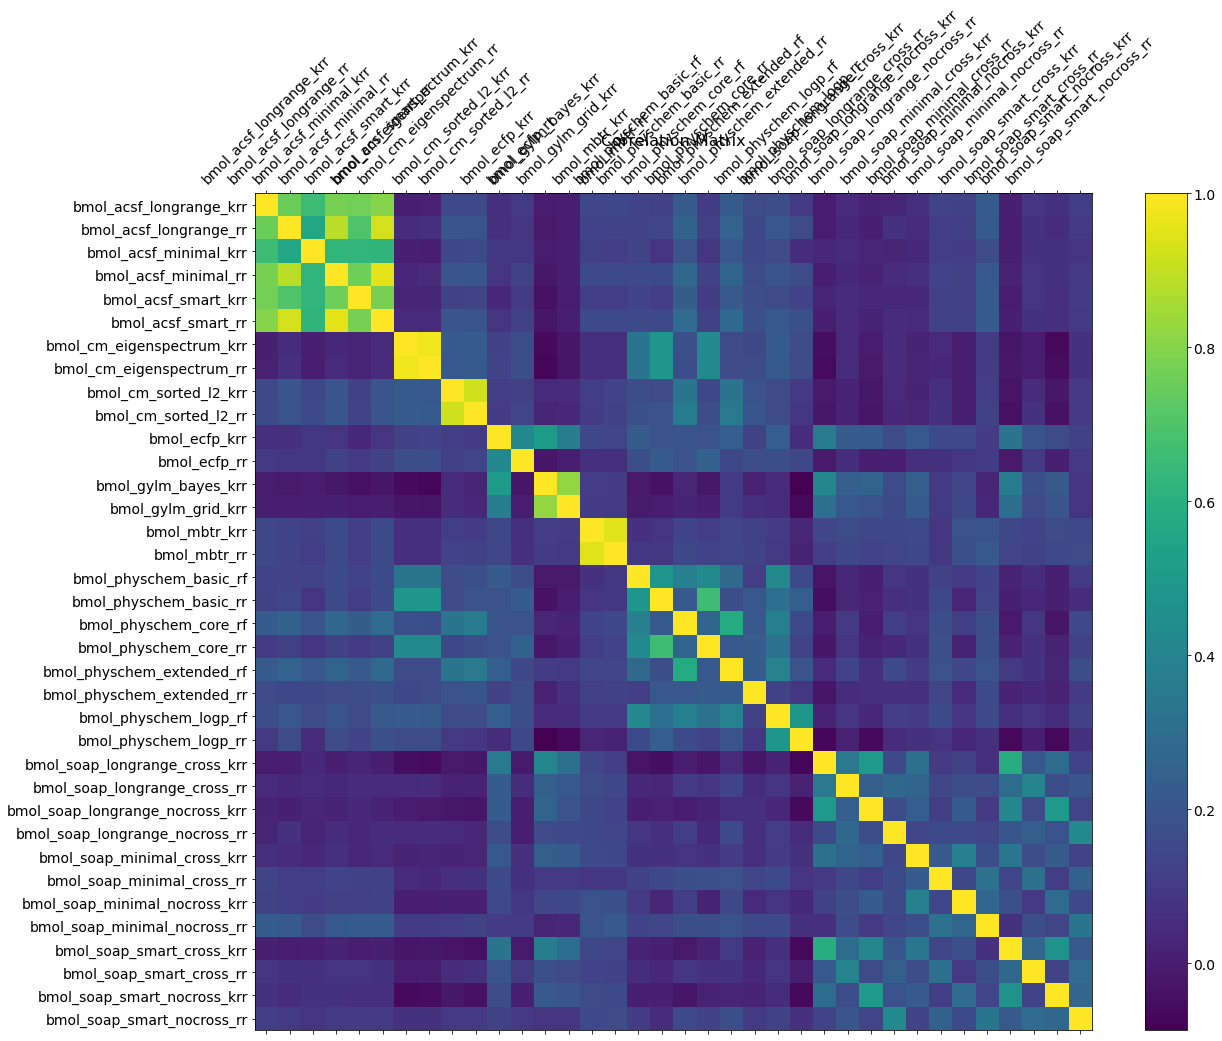

In [21]:
f = plt.figure(figsize=(19, 15))
plt.matshow(correlation_matrix, fignum=f.number)
plt.xticks(range(correlation_matrix.shape[1]), by_model.keys(), fontsize=14, rotation=45)
plt.yticks(range(correlation_matrix.shape[1]), by_model.keys(), fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

## KPCA this correlation matrix

In [22]:
from asaplib.reducedim import Dimension_Reducers

reduce_dict = {}
reduce_dict['kpca'] = {"type": 'SPARSE_KPCA',
                        'parameter':{"n_components": 10,
                                     "n_sparse": -1, # no sparsification
                                "kernel": {"first_kernel": {"type": 'linear'}}}}
dreducer = Dimension_Reducers(reduce_dict)

Using kernel PCA (sparsified) ...


/Users/tc/miniconda/envs/chicken/lib/python3.7/site-packages/umap_learn-0.4.3-py3.7.egg/umap/spectral.py:4: NumbaDeprecationWarning: No direct replacement for 'numba.targets' available. Visit https://gitter.im/numba/numba-dev to request help. Thanks!
  import numba.targets


In [23]:
proj = dreducer.fit_transform(correlation_matrix)

Not using any sparsification


# Visualizations

In [24]:
from asaplib.plot import Plotters

Using scatter plot ...
Using annotation plot ...


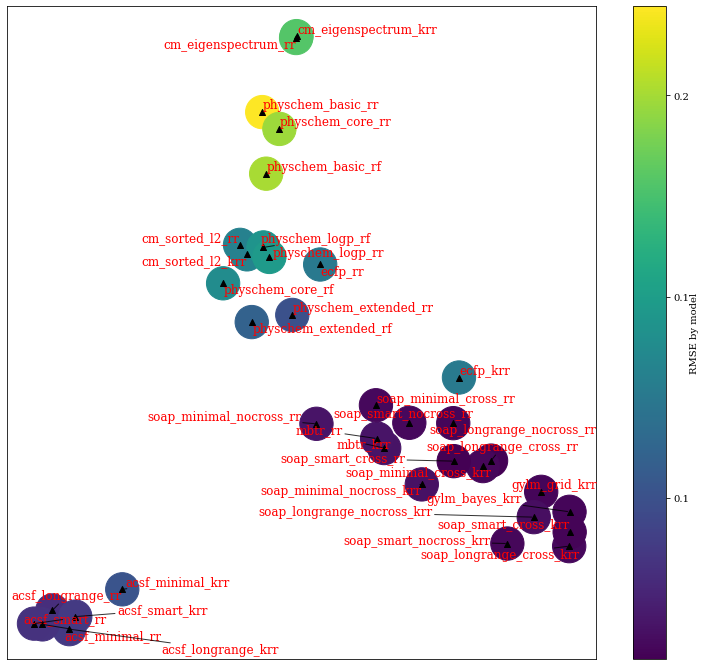

In [25]:
fig_spec = { 'outfile': file_prefix+'-model-kpca.pdf',
                'show': False,
                'title': None,
                'size': [12*1.1, 12],
                'xlabel': None, 'ylabel': None,
                            'xaxis': False, 'yaxis': False,
                            'remove_tick': True,
                'cmap': 'viridis',
                    'components':{
                    'first_p': {'type': 'scatter', 'clabel': 'RMSE by model',
                                'vmin':None, 'vmax': None},
                    'second_p': {"type": 'annotate', 'adtext': True} 
                    }
                   }
    
asap_plot = Plotters(fig_spec)

plotcolor = [ lc_by_model[k][-1,1] for k in by_model.keys()]
annotate = list([ x[5:] for x in by_model.keys()])
asap_plot.plot(proj[:, [0,1]], plotcolor, [], annotate)
#fig.savefig(file_prefix+'-model-kpca.pdf')

## compare all models (with diff train ratios)

# kernel matrix of descriptors

In [26]:
desc_kmat = np.loadtxt(prefix+"-descriptors.kmat")
desc_names = np.genfromtxt(prefix+"-descriptors.names", dtype='str')

In [27]:
print(desc_names)

['bmol_acsf_minimal_krr' 'bmol_acsf_smart_krr' 'bmol_acsf_longrange_krr'
 'bmol_cm_sorted_l2_krr' 'bmol_cm_eigenspectrum_krr' 'bmol_ecfp_krr'
 'bmol_gylm_grid_krr' 'bmol_gylm_bayes_krr' 'bmol_mbtr_krr'
 'bmol_soap_minimal_nocross_krr' 'bmol_soap_minimal_cross_krr'
 'bmol_soap_smart_nocross_krr' 'bmol_soap_smart_cross_krr'
 'bmol_soap_longrange_nocross_krr' 'bmol_soap_longrange_cross_krr']


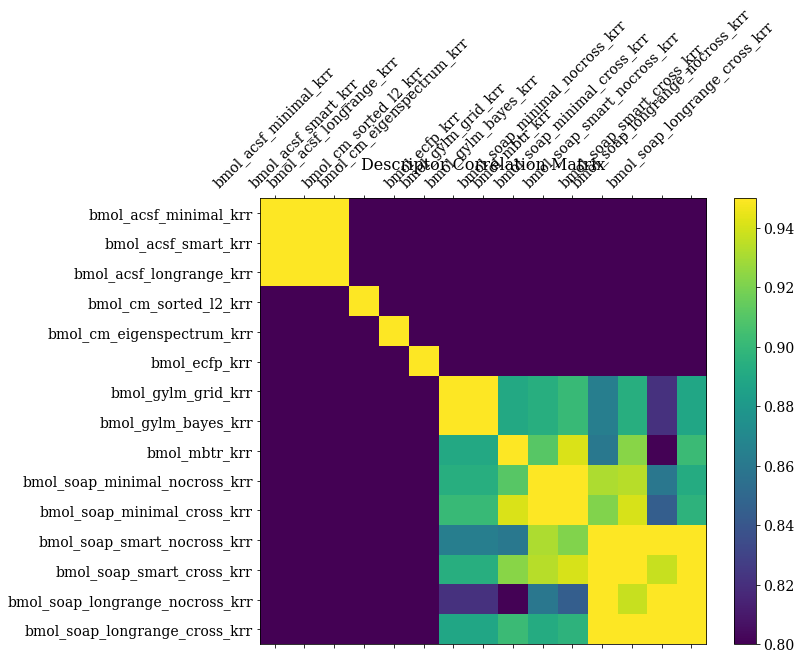

In [28]:
f = plt.figure(figsize=(10, 8))
plt.matshow(desc_kmat, fignum=f.number,vmin=0.8, vmax=0.95)
plt.xticks(range(desc_kmat.shape[1]), desc_names, fontsize=14, rotation=45)
plt.yticks(range(desc_kmat.shape[1]), desc_names, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Descriptor Correlation Matrix', fontsize=16);

In [29]:
reduce_dict2 = {}
reduce_dict2['kpca'] = {"type": 'SPARSE_KPCA',
                        'parameter':{"n_components": 10,
                                     "n_sparse": -1, # no sparsification
                                "kernel": {"first_kernel": {"type": 'cosine'}}}}

dreducer2 = Dimension_Reducers(reduce_dict2)
proj = dreducer2.fit_transform(desc_kmat)

Using kernel PCA (sparsified) ...
Not using any sparsification


Using scatter plot ...
Using annotation plot ...


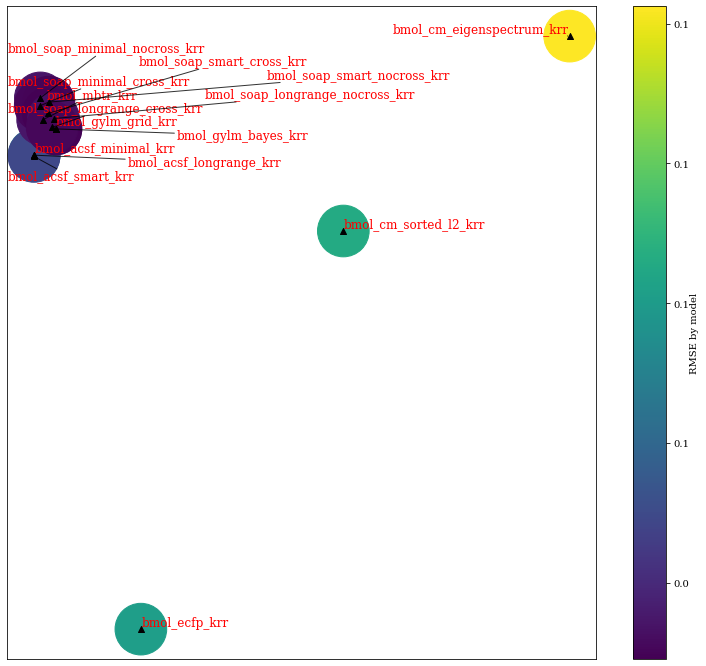

In [30]:
fig_spec = { 'outfile': file_prefix+'-descriptor-similarity.pdf',
                'show': False,
                'title': None,
                'size': [12*1.1, 12],
                'xlabel': None, 'ylabel': None,
                            'xaxis': False, 'yaxis': False,
                            'remove_tick': True,
                'cmap': 'viridis',
                    'components':{
                    'first_p': {'type': 'scatter', 'clabel': 'RMSE by model',
                                'vmin':None, 'vmax': None},
                    'second_p': {"type": 'annotate', 'adtext': True} 
                    }
                   }
    
asap_plot = Plotters(fig_spec)
plotcolor = [ lc_by_model[k][-1,1] for k in desc_names]
#plotcolor = np.arange(len(proj))
asap_plot.plot(proj[:, [0,2]], plotcolor, [], desc_names)

In [31]:
# select out certain components
sub_correlation_matrix = np.ones((len(desc_names),len(desc_names)))

for i, desc in enumerate(desc_names):
    index_now = list(by_model.keys()).index(desc)
    for j, desc2 in enumerate(desc_names):
        index_2 = list(by_model.keys()).index(desc2)
        sub_correlation_matrix[i,j] = correlation_matrix[index_now,index_2]

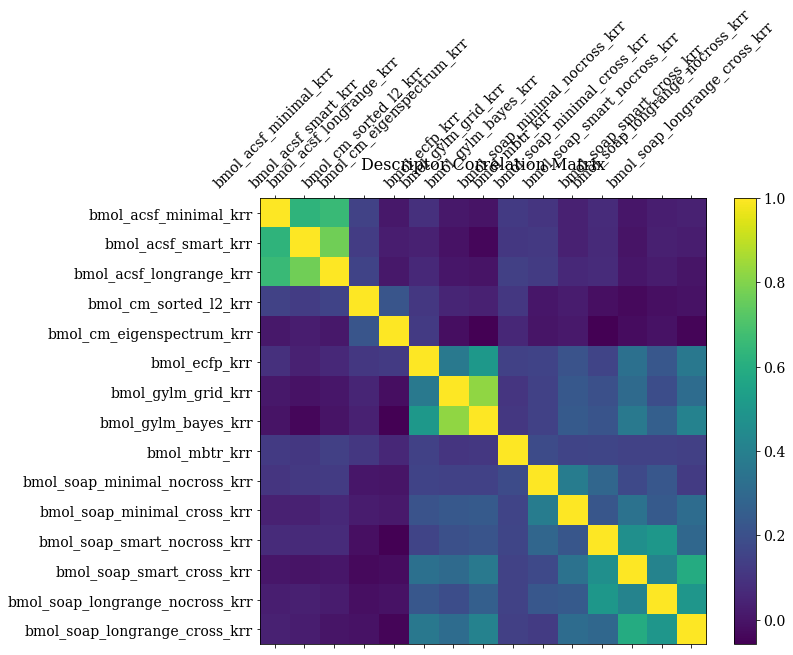

In [32]:
f = plt.figure(figsize=(10, 8))
plt.matshow(sub_correlation_matrix, fignum=f.number)
plt.xticks(range(sub_correlation_matrix.shape[1]), desc_names, fontsize=14, rotation=45)
plt.yticks(range(sub_correlation_matrix.shape[1]), desc_names, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Descriptor Correlation Matrix', fontsize=16);

In [33]:
get_score(sub_correlation_matrix[4], desc_kmat[4])

{'MAE': 0.08831411202172082,
 'RMSE': 0.11161699326399403,
 'SUP': 0.1977414978358864,
 'R2': 0.7672917440347229,
 'CORR': 0.0947274730356128}

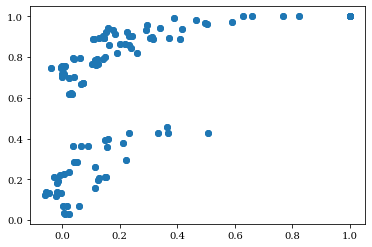

In [36]:
plt.scatter(sub_correlation_matrix.flatten(), desc_kmat.flatten())
#plt.ylim([0.2,1])

In [35]:
get_score(sub_correlation_matrix.flatten(), desc_kmat.flatten())

{'MAE': 0.4238519449286527,
 'RMSE': 0.5064033570065092,
 'SUP': 0.7844952057116185,
 'R2': -1.5616297270283757,
 'CORR': 0.7398149915936488}